In [20]:
%matplotlib inline
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np

In [21]:
mer = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/GalaxyFilteringTask/star_catalog.fits', hdu=1)

In [22]:
original = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzStarSed/develop.fits', hdu=1)

In [23]:
refactor = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/NnpzStarSed/cpp.fits', hdu=1)

In [24]:
[c for c in original.colnames if c not in refactor.colnames]

[]

In [25]:
joint = join(original, refactor, 'OBJECT_ID')
joint = join(joint, mer, 'OBJECT_ID')

In [26]:
diff_flags = ~np.equal(joint['FLAGS_1'], joint['FLAGS_1'])
diff_flags.sum(), len(refactor)

(0, 1000)

In [29]:
joint['NEIGHBOR_WEIGHTS_1'].sum(axis=1)[0:10]

array([5.6585784e+00, 1.9916866e+01, 6.4748075e-11, 1.8740590e-26,
       5.1876839e-35, 7.2353352e-11, 3.7138881e-09, 6.1166082e-07,
       1.3241181e-01, 5.8338651e-06], dtype=float32)

In [30]:
joint['NEIGHBOR_WEIGHTS_2'].sum(axis=1)[0:10]

array([4.2309961e+00, 1.9337553e+01, 8.8589350e-06, 1.8740568e-26,
       1.8858498e-18, 2.3676896e-11, 3.7289363e-09, 6.1166031e-07,
       1.3241181e-01, 5.8338751e-06], dtype=float32)

In [11]:
bands = [
    'euclid/VIS_MEAN', 'lsst/u_MEAN',
    'subaru/IB427_MEAN', 'subaru/IB464_MEAN',
    'subaru/IB738_MEAN', 'subaru/IB827_MEAN',
    'euclid/Y_MEAN', 'euclid/H_MEAN'
]

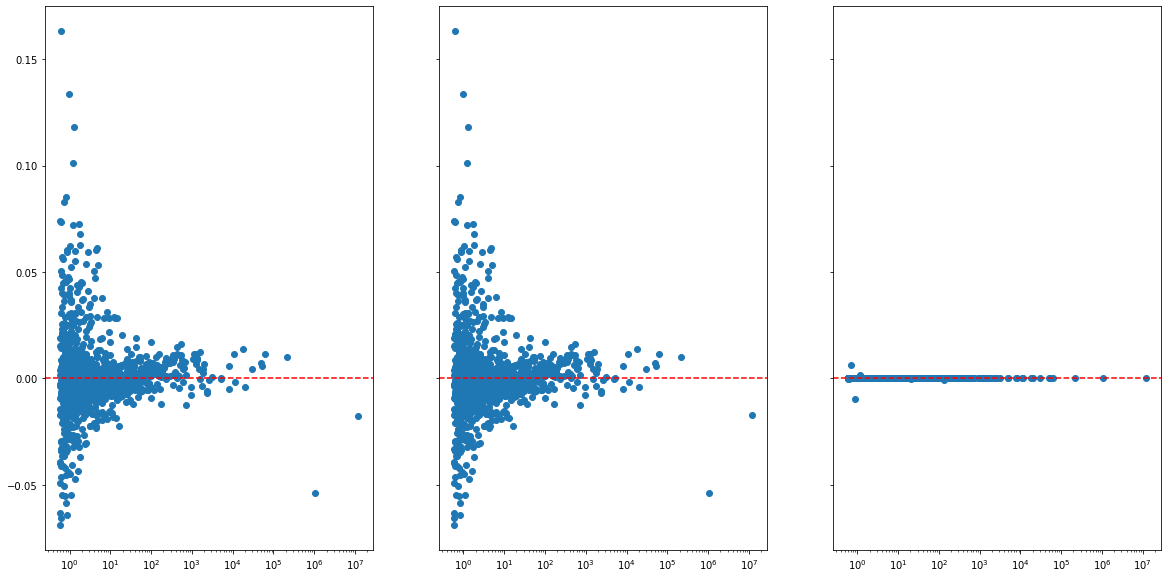

In [12]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(20, 10))
axes[0].scatter(joint['FLUX_DETECTION_TOTAL'], (joint['euclid/VIS_MEAN_1']-joint['FLUX_DETECTION_TOTAL'])/joint['FLUX_DETECTION_TOTAL'])
axes[1].scatter(joint['FLUX_DETECTION_TOTAL'], (joint['euclid/VIS_MEAN_2']-joint['FLUX_DETECTION_TOTAL'])/joint['FLUX_DETECTION_TOTAL'])
axes[2].scatter(joint['FLUX_DETECTION_TOTAL'], (joint['euclid/VIS_MEAN_2']-joint['euclid/VIS_MEAN_1'])/joint['euclid/VIS_MEAN_1'])
axes[0].axhline(0., linestyle='--', color='r')
axes[1].axhline(0., linestyle='--', color='r')
axes[2].axhline(0., linestyle='--', color='r')
plt.xscale('log')

In [17]:
np.sort(joint['NEIGHBOR_WEIGHTS_1'][0])

array([0.02487936, 0.02649889, 0.03020618, 0.07379836, 0.07396785,
       0.07400338, 0.07429859, 0.0743079 , 0.07451887, 0.07460638,
       0.07551432, 0.0760869 , 0.07778209, 0.07866813, 0.08267567,
       0.08292098, 0.08369758, 0.08380711, 0.0852289 , 0.08952068,
       0.09607761, 0.09689862, 0.09761425, 0.42512542, 0.5763427 ,
       0.58449006, 0.59012747, 0.59154844, 0.5916184 , 0.5917476 ],
      dtype=float32)

In [18]:
np.sort(joint['NEIGHBOR_WEIGHTS_2'][0])

array([0.02649889, 0.03055437, 0.0718632 , 0.07195924, 0.07374368,
       0.07376268, 0.07379836, 0.07400337, 0.07418165, 0.07429859,
       0.0743427 , 0.07486489, 0.07541527, 0.07551432, 0.07608691,
       0.07819166, 0.08267567, 0.08292098, 0.08380711, 0.08436395,
       0.08979184, 0.09371202, 0.09607761, 0.09761426, 0.14224267,
       0.14618012, 0.3743634 , 0.5763427 , 0.59012747, 0.5916968 ],
      dtype=float32)